#### Import modules

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

pd.set_option('display.max_columns', None)

#### Load the data provided

In [68]:
Train = pd.read_csv("Train.csv")

In [69]:
Train.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [70]:
Test = pd.read_csv("Test.csv")
Test2 = pd.read_csv("Test.csv")

In [71]:
Test.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle


In [72]:
test_game_statistics = pd.read_csv("test_game_statistics.csv")

In [73]:
train_game_statistics = pd.read_csv("train_game_statistics.csv")

In [74]:
train_game_statistics.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
Train.shape, Test.shape, train_game_statistics.shape, test_game_statistics.shape

((412, 7), (234, 6), (1571577, 28), (780234, 24))

### Data EDA 

  

#### How many seasons are in train and test ?

<Axes: ylabel='count'>

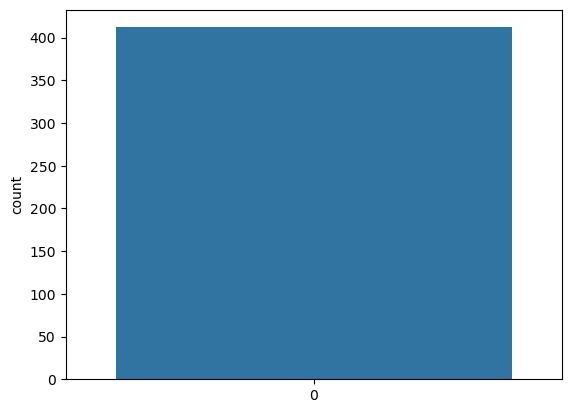

In [76]:
sns.countplot(Train["Season"])

<Axes: ylabel='count'>

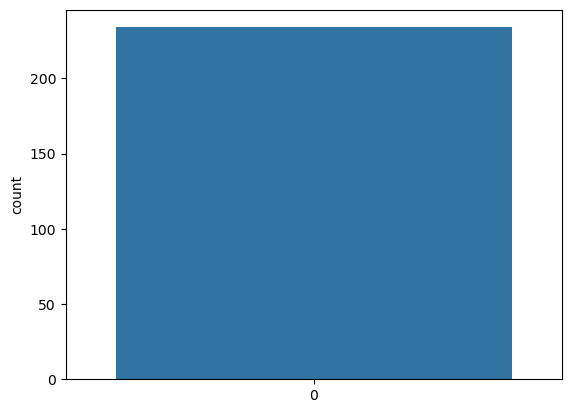

In [77]:
sns.countplot(Test["Season"])

- We can see that 2 seasons are provided in the training data while one season is provided in the the test

#### How many unique match IDs are provided?

- From a football perspective, can you find out what's a match, are matches specific to every season?

In [78]:
Train.Match_ID.nunique()

224

In [79]:
Test.Match_ID.nunique()

213

#### How many games were played in train seasons and test seasons?

In [80]:
Train.Game_ID.nunique()

412

In [81]:
Test.Game_ID.nunique()

234

#### How many teams were away and home?

In [82]:
Train["Home Team"].nunique()

19

In [83]:
Train["Away Team"].nunique()

19

In [84]:
Test["Home Team"].nunique()

16

In [85]:
Test["Away Team"].nunique()

16

#### Did the team Win, Lose or Draw?

- Let's look at the target column, the reason for creating our machine learning model, the goal of every footbal game is to determine the winner

In [86]:
Train["Score"].nunique()

3

### Feature Engineering and Modelling

In [87]:
Train["Train"] = 1
Test["Train"]= 0

train_test = pd.concat([Train, Test])

In [88]:
train_test.shape

(646, 8)

In [89]:
train_test.head(3)

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score,Train
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,1
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw,1
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win,1


In [90]:
game_statistics = pd.concat([train_game_statistics, test_game_statistics])

In [91]:
all_data = game_statistics.merge(train_test, on="Game_ID")

In [92]:
all_data.shape

(2351811, 35)

In [93]:
all_data.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Goals_scored,Goals_conceded,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value,Date,Season_y,Match_ID,Home Team,Away Team,Score,Train
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,2,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1


In [94]:
test_f= all_data[all_data['Train'] == 0]
train_f = all_data[all_data['Train'] == 1]

In [95]:
le = preprocessing.LabelEncoder()

train_f["Game_ID"] = le.fit_transform(train_f["Game_ID"])
game_mapping = dict(zip(le.classes_, range(len(le.classes_))))
train_f["Player_ID"] = le.fit_transform(train_f["Player_ID"])


test_f["Game_ID"] = le.fit_transform(test_f["Game_ID"])
game_mapping = dict(zip(le.classes_, range(len(le.classes_))))
test_f["Player_ID"] = le.fit_transform(test_f["Player_ID"])

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_47224/1115960339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_f["Game_ID"] = le.fit_transform(train_f["Game_ID"])
/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_47224/1115960339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_f["Player_ID"] = le.fit_transform(train_f["Player_ID"])
/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_47224/1115960339.py:8: SettingWithCopyWarning: 
A value is trying to be set o

- For the teams ensure they are transformed the same, you do not want a scenario where team Circinus is mapped as 1 on one column and mapped as 2 on another column, this will be inconsistent and will affect the model results

In [96]:
train_f["Team"] = le.fit_transform(train_f["Team"])

mapping = dict(zip(le.classes_, range(len(le.classes_))))

test_f["Team"] = le.fit_transform(test_f["Team"])

mapping = dict(zip(le.classes_, range(len(le.classes_))))

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_47224/377666118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_f["Team"] = le.fit_transform(train_f["Team"])
/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_47224/377666118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f["Team"] = le.fit_transform(test_f["Team"])


In [97]:
mapping

{'Andromeda': 0,
 'Antennae': 1,
 'Backward': 2,
 'Cartwheel': 3,
 'Cigar': 4,
 'Circinus': 5,
 'Comet': 6,
 'Cosmos Redshift 7': 7,
 'Fireworks': 8,
 'Malin 1': 9,
 'Medusa Merger': 10,
 'Milky Way': 11,
 'Needle': 12,
 'Sunflower': 13,
 'Tadpole': 14,
 'Whirlpool': 15}

In [98]:
train_f["Opposition_Team"] = train_f["Opposition_Team"].apply(lambda x: mapping[x])
train_f["Home Team"] = train_f["Home Team"].apply(lambda x: mapping[x])
train_f["Away Team"] = train_f["Away Team"].apply(lambda x: mapping[x])

test_f["Opposition_Team"] = test_f["Opposition_Team"].apply(lambda x: mapping[x])
test_f["Home Team"] = test_f["Home Team"].apply(lambda x: mapping[x])
test_f["Away Team"] = test_f["Away Team"].apply(lambda x: mapping[x])

KeyError: 'Coma Pinwheel'

In [ ]:
train_f["Action"] = le.fit_transform(train_f["Action"])
train_f["Half"] = le.fit_transform(train_f["Half"])
train_f["Manager"] = le.fit_transform(train_f["Manager"])

test_f["Action"] = le.fit_transform(test_f["Action"])
test_f["Half"] = le.fit_transform(test_f["Half"])
test_f["Manager"] = le.fit_transform(test_f["Manager"])

- For this nb, I'll drop most of the columns that have alot on NAN values, you can choose to fill those NAN values since the columns might be worth including in the modeling

- I'll drop also the column in train game statistics not present in the test game stats; you can use these columns for more analysis and feature engineering.

In [ ]:
train_f.drop(["next_player", "next_action", "next_x", "next_y", "event_id", "next_team",
               "next_event_id", "xt_value", "Date", "Goals_scored", "Goals_conceded", "Action",], axis=1, inplace=True)

test_f.drop(["next_player", "next_action", "next_x", "next_y", "event_id", "next_team",
               "next_event_id", "xt_value", "Date", "Goals_scored", "Goals_conceded", "Action",], axis=1, inplace=True)

In [ ]:
Train =train_f[train_f["Train"] == 1]
Train.drop("Train", axis=1, inplace=True)
Test = test_f[test_f["Train"] == 0]
Test.drop(["Train", "Score"], axis=1, inplace=True)
Test = Test.reset_index(drop=True)

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_47224/3684393416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop("Train", axis=1, inplace=True)
/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_47224/3684393416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(["Train", "Score"], axis=1, inplace=True)


In [ ]:
Train.shape, Test.shape

((1571577, 22), (780234, 21))

In [ ]:
Train.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team,Score
0,645,534,1.0,52.5,34.0,6,0,2,52,2,0.0,0.0,1.0,0.0,1.0,0.03,0.37,2,39.0,2,6,Home Win
1,645,534,2.0,52.5,34.0,6,0,2,52,2,0.0,0.0,0.0,0.0,0.0,0.03,0.37,2,39.0,2,6,Home Win


In [ ]:
Test.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team
0,640,106,1.0,52.5,34.0,14,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14
1,640,106,2.0,52.5,34.0,14,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14


In [ ]:
# to avoid nans, will map score only in the training set
Train["Score"] = le.fit_transform(Train["Score"])
score_mapping = dict(zip(le.classes_, range(len(le.classes_))))

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_47224/3210478053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Score"] = le.fit_transform(Train["Score"])


In [ ]:
score_mapping

{'Away win': 0, 'Draw': 1, 'Home Win': 2}

### Modelling

- This is a classification problem that require using classification machine learning algorithms

In [ ]:
X = Train.drop(columns=["Game_ID","Score"], axis=1)
y = Train["Score"]

In [ ]:
X_test= test_f

In [ ]:
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()  
dt.fit(X, y) 

DecisionTreeClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X, y)

# Make predictions on the test set
#_pred = knn_classifier.predict(Test)

KNeighborsClassifier()

In [ ]:
# Test = Test[~Test.Shots.isnull()]
Test = Test.fillna(0)
Test.head()

,Game_ID,Player_ID,id,X,Y,Team,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team
0,640,106,1.0,52.5,34.0,14,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14
1,640,106,2.0,52.5,34.0,14,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14
2,640,417,3.0,37.5,30.9,14,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.70,1.03,3,158.0,18,14
3,640,417,4.0,37.5,30.9,14,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.70,1.03,3,158.0,18,14
4,640,24,5.0,26.0,10.8,18,0,3,24,14,0.0,0.0,0.0,0.0,0.0,0.77,1.10,3,158.0,18,14


In [ ]:
X_test.isnull().sum()

Game_ID              0
Player_ID            0
id                   0
X                    0
Y                    0
Team                 0
Half                 0
Season_x             0
Manager              0
Opposition_Team      0
Shots                0
SoT                  0
Accurate passes      0
Inaccurate passes    0
Passes               0
Start_minutes        0
End_minutes          0
Season_y             0
Match_ID             0
Home Team            0
Away Team            0
dtype: int64

In [ ]:
X_test.dropna(how="all")

,Game_ID,Player_ID,id,X,Y,Team,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team
0,640,106,1.0,52.5,34.0,14,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14
1,640,106,2.0,52.5,34.0,14,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14
2,640,417,3.0,37.5,30.9,14,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.70,1.03,3,158.0,18,14
3,640,417,4.0,37.5,30.9,14,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.70,1.03,3,158.0,18,14
4,640,24,5.0,26.0,10.8,18,0,3,24,14,0.0,0.0,0.0,0.0,0.0,0.77,1.10,3,158.0,18,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780229,2,757,3661.0,42.1,57.4,1,1,3,23,8,0.0,0.0,0.0,0.0,0.0,96.33,96.67,3,87.0,8,1
780230,2,757,3662.0,42.1,57.4,1,1,3,23,8,0.0,0.0,0.0,0.0,0.0,96.33,96.67,3,87.0,8,1
780231,2,127,3663.0,7.5,19.6,8,1,3,26,1,0.0,0.0,0.0,0.0,0.0,96.42,96.75,3,87.0,8,1
780232,2,127,3664.0,7.5,19.6,8,1,3,26,1,0.0,0.0,0.0,0.0,0.0,96.42,96.75,3,87.0,8,1


### Predict on the test set

In [ ]:
pred_clf=clf.predict_proba(X_test)[:,1]
pred_clf

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Game_ID


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, pred_clf))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
pred_dt = dt.predict_proba(X)
pred_dt.min()

0.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, pred_dt))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
pred_knn_classifier  = knn_classifier.predict_proba(X)

pred_knn_classifier

In [ ]:
X_test["Score"] = pred_clf

# test_predictions

ValueError: Length of values (1571577) does not match length of index (780234)

In [ ]:
Test["Score"].unique()

In [ ]:
score_mapping = {value:key for key, value in score_mapping.items()}
Test["Score"] = Test["Score"].apply(lambda x: score_mapping[x])

In [ ]:
game_mapping = {value:key for key, value in game_mapping.items()}
Test["Game_ID"] = Test["Game_ID"].apply(lambda x: game_mapping[x])

In [ ]:
Test["Score"].unique()

In [ ]:
Test.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Half,Season_x,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season_y,Match_ID,Home Team,Away Team
0,ID_ZUPS2JD2,106,1.0,52.5,34.0,14,0,3,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14
1,ID_ZUPS2JD2,106,2.0,52.5,34.0,14,0,3,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14


In [ ]:
submit = Test[["Game_ID", "Score"]]

KeyError: "['Score'] not in index"

- Here I'm randomly selecting the score for every unique game ID, you can choose to be creative and look a the prediction with multiple rows.

In [ ]:
submit.drop_duplicates(subset = ["Game_ID"], inplace=True)

/var/folders/sd/lqrhfhxd16s8xnv4w6b6hjc00000gq/T/ipykernel_45900/1230856750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit.drop_duplicates(subset = ["Game_ID"], inplace=True)


In [ ]:
submit = submit.reset_index(drop=True)

In [ ]:
submit.shape

(234, 4)

In [ ]:
submit.head()

,Game_ID,Score_0,Score_1,Score_2
0,640,1,0,0
1,639,0,1,0
2,638,0,0,1
3,637,0,1,0
4,634,1,0,0


In [ ]:
submit = pd.get_dummies(submit, columns = ['Score'], prefix=None)

In [ ]:
submit.head(2)

,Game_ID,Score_0,Score_1,Score_2
0,640,1,0,0
1,639,0,1,0


In [ ]:
submit.rename(columns = {"Score_0": "Away win", "Score_1":"Draw", "Score_2":"Home Win"}, inplace=True)

In [ ]:
submit.head(2)

,Game_ID,Away win,Draw,Home Win
0,640,1,0,0
1,639,0,1,0


In [ ]:
submit.to_csv("submission.csv", index=False)